# Library
Estas librerias son las que utilizaremos para el proyecto. Tanto para el grafico como para la logica.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# GenerateMap
En esta ocasion esta function tiene la logica de implementar la anchura y el largo de nodos ejm:
**width = 10**
**height = 10**
**Total de nodos existentes son 10 * 10 = 100**
Dentro de los pointsDist y pointEntre son los puntos de distribucion y entrega respectivamente. Estos se ejecutan luego de la elaboracion del mapa principal, para que luego se establesca en los nodos existente el puntos ya sea distribucion o entrega.

In [2]:
def generateMap(width, height, pointDist, pointEntre):
    
    Map = []
    distribudor = []
    entrega = []
    
    x = []
    y = []
    
    dx = []
    dy = []
    
    ex = []
    ey = []
    
    dic = {}
    
    di = pointDist
    en = pointEntre
    reduce = di + en
    
    if reduce >= width*height:
        return Map, distribudor, entrega  
    
    Bwidth = np.random.randint(40,70,width)
    Bheight = np.random.randint(40,80,height)
    
    for i in range(width):
        tem = []
        for j in range(height):
            n = random.randint(0,30)
            x.append(sum(Bwidth[:i]))
            y.append(sum(Bheight[:j]))
            tem.append([sum(Bwidth[:i]),sum(Bheight[:j]), 0])
        Map.append(tem[:])
    
    while reduce != 0:
        
        xx = random.randint(0,width-1)
        yy = random.randint(0,height-1)
        new = (str(xx)+str(yy))      
                
        if new not in dic:
            dic[new] = 1
            if en == 0 and di == 0:
                reduce = reduce -1
            elif en == 0:
                #Pertenece solamente a un distribudor
                Map[xx][yy][2] = 1
                distribudor.append([Map[xx][yy][0],Map[xx][yy][1]])
                dx.append(sum(Bwidth[:xx]))
                dy.append(sum(Bheight[:yy]))
                #plt.scatter(sum(Bwidth[:xx]), sum(Bheight[:yy]), s = 20,  color='green')
                di = di - 1
                reduce = reduce -1
            elif di == 0:
                #Pertenece solamente a los puntos de entrega
                Map[xx][yy][2] = 2
                entrega.append([Map[xx][yy][0],Map[xx][yy][1]])
                ex.append(sum(Bwidth[:xx]))
                ey.append(sum(Bheight[:yy]))
                en = en - 1
                reduce = reduce -1
            else:
                ops = random.randint(0,1)
                if ops == 0:
                    #Pertenece solamente a un distribudor
                    Map[xx][yy][2] = 1
                    distribudor.append([Map[xx][yy][0],Map[xx][yy][1]])
                    dx.append(sum(Bwidth[:xx]))
                    dy.append(sum(Bheight[:yy]))
                    di = di - 1
                    reduce = reduce -1
                elif ops == 1:
                    #Pertenece solamente a los puntos de entrega
                    Map[xx][yy][2] = 2
                    entrega.append([Map[xx][yy][0],Map[xx][yy][1]])
                    ex.append(sum(Bwidth[:xx]))
                    ey.append(sum(Bheight[:yy]))
                    en = en - 1
                    reduce = reduce -1
    
    table = [x,y,dx,dy,ex,ey]
    
    return Map, distribudor, entrega, table

# ConvertEdge
Esta funcion se encarga de convertir la matrix generada en la funcion GenerateMap a una lista de nodos, pero sin asociacion.

In [3]:
def convertEdge(M):
    
    graph = []
    distr = []
    entr = []
    
    w = len(M)
    h = len(M[0])
    node = 0
    for i in range(w):
        for j in range(h):
            y, x, t = M[i][j]
            graph.append([node,x, y, t])
            if t == 1:
                distr.append([node,x,y,t])
            if t == 2:
                entr.append([node,x,y,t])
                
            node += 1
    
    return np.array(graph), distr, entr

# Hito 1 Implementacion
Esta funcion recibe la variable M que es la matrix generada en GenerateMap que posteriormente se utilizada para la asociacion de nodos de manera no directa y se utilizara para el apoyo la funcion **ConvertEdge** para establecer los nodos asociados respectivos.

In [4]:
def graphNoDirec(M):
    
    graph = []
    edges, dist, entre = convertEdge(M)
    jump = len(M)
    jump2 = len(M[0])
    
    for i in range(len(M)):        
        for j in range(len(M[0])):
            tem = []
            
            if j == 0:
                tem.append(edges[(i*jump2)+j+1])
            elif j+1 == len(M[0]):
                tem.append(edges[(i*jump2)+j-1])
            else:
                tem.append(edges[(i*jump2)+j+1])
                tem.append(edges[(i*jump2)+j-1])
                
            if i == 0:
                tem.append(edges[(i*jump2)+jump2+j])
            elif i+1 == len(M):
                tem.append(edges[(i*jump2)-jump2+j])
            else:
                tem.append(edges[(i*jump2)+jump2+j])
                tem.append(edges[(i*jump2)-jump2+j])
            
            graph.append(tem)
    return graph, edges, dist, entre

# Hito 2 Implementacion
Para el hito 2 teniamos el trabajo que el un punto de distribucion llege a todos los nodos y esto se repetia de la misma manera a todos los puntos de distribucion.

In [5]:
def bfs(M):
    
    Graph, Edges, distribucion, entrega = graphNoDirec(M)
    
    ways = []
    
    while distribucion:
        init, ix, iy, it = distribucion[0]
        pentr = len(entrega)
        dic = {}
        
        n = len(Edges)
        parent = [[None]]*n
        visited = [False]*n

        visited[init] = True
        parent[init] = [init]

        stack = []
        stack.append(init)
        while stack and pentr != 0:
            pos = stack[0]

            for i in range(len(Graph[pos])):
                node, x, y, t = Graph[pos][i]

                if visited[node] == False:
                    lp = parent[pos][:]
                    lp.append(node)
                    parent[node] = lp

                    if t == 2:
                        dic[node] = parent[node]
                        pentr = pentr - 1

                    visited[node] = True
                    stack.append(node)

            stack.pop(0)
        ways.append([init, dic])
        distribucion.pop(0)
    return ways

# Hito 3 Implementacion
Para el hito 3 tenemos el trabajo que el un punto de distribucion llege los puntos de entrega mas cercanos segun lo considere el la distancia entre cada arco. A esta diferencia lo denominaremos heuritica el cual se ejecutara para que posteriormente re establesca para un nodo tenga sus caminos mas cortos.

In [6]:
def heuristic(x, y):
    if x < 0:
        x *= -1
    if y < 0:
        y *= -1
    return x + y

In [7]:
def subRecorrido(GD, GE):
    
    d = len(GD)
    e = len(GE)
    
    estack = [[] for _ in range(d)]
    dstack = []
    find = [[] for _ in range(d)]
    
    for i in range(d):
        dstack.append(GD[i][0])
    
    for i in range(e):
        allowed = float('inf')
                
        for j in range(d):
            x = GE[i][1] - GD[j][1]
            y = GE[i][2] - GD[j][2]
            vheuristic = heuristic(x,y)
            
            if vheuristic < allowed:
                allowed = vheuristic
                pos = j
        estack[pos].append(GE[i])
        find[pos].append(GE[i][0])
    return estack, dstack, find

In [8]:
def hito3(M):
    
    Graph, Edges, distribucion, entrega = graphNoDirec(M)
    
    ways = []
    
    dic = {}
        
    n = len(Edges)
     
    record, drecord, find = subRecorrido(distribucion, entrega)
    
    while record:
        
        visited = [False]*n
        parent = [[None]]*n
        
        pentr = len(record[0])        
        
        stack = []        
        stack.append(drecord[0])
        first = stack[:]
        parent[stack[0]] = first
        visited[stack[0]] = True
        
        remdic = {}
        rem = []
        #rem.append([stack[0][:]])
        while stack and pentr != 0:
            pos = stack[0]

            for i in range(len(Graph[pos])):
                node, x, y, t = Graph[pos][i]
                if visited[node] == False:
                    
                    lp = parent[pos][:]
                    lp.append(node)
                    parent[node] = lp
                    visited[node] = True
                    stack.append(node)

                    if node in find[0]:
                        dic[node] = parent[node]
                        remdic[node] = parent[node]
                        pentr = pentr - 1
            
            stack.pop(0)
        ways.append([first[0], remdic])
        find.pop(0)
        drecord.pop(0)
        record.pop(0)
        
    return dic, Edges, ways

# Funciones para graficar (opcional)

## Graficar mapa
Los puntos negros, rojo y azul representan los puntos de distribucion, entrega y esquinas respectivamente.

In [9]:
def drawTable(table, point, size):
    
    if size == 's':
        plt.figure(figsize=(150,150))
        
    plt.plot(table[0], table[1], 's', marker=point, c='#536DFE')
    plt.plot(table[2], table[3], 's', marker=point, c='#212121')
    plt.plot(table[4], table[5], 's', marker=point, c='#FF5252')

## Graficar los caminos
Dentro de esta funcion se graficara los puntos de reparticion de un nodo al mas cercano segun el algoritmo bfs y esto para cada puntos de distribucion segun se asocia al puntos de distribucion

In [10]:
def drawRecorrido(table, recorrido, edges, point, size, color):
        
    rec = list(dict(recorrido).values())
    
    if size == 's':
        plt.figure(figsize=(150,150))
    
    while rec:
        
        edge = edges[rec[0]][:]
        
        for i in range(len(edge)-1):
            point1 = [edge[i][2], edge[i][1]]
            point2 = [edge[i+1][2], edge[i+1][1]]
            
            x_values = [point2[0], point1[0]]
            y_values = [point2[1], point1[1]]
            plt.plot(x_values,y_values, c=color)
            
        rec.pop(0)
    drawTable(table, point, 'n')

In [13]:
def drawRecorridoWithWay(table, recorrido1, recorrido2, edges, point, size, color1, color2):
        
    rec = list(dict(recorrido1).values())
    
    if size == 's':
        plt.figure(figsize=(150,150))
        
    while rec:
        
        edge = edges[rec[0]][:]
        
        for i in range(len(edge)-1):
            point1 = [edge[i][2], edge[i][1]]
            point2 = [edge[i+1][2], edge[i+1][1]]
            
            x_values = [point2[0], point1[0]]
            y_values = [point2[1], point1[1]]
            plt.plot(x_values,y_values, c=color1)
            
        rec.pop(0)
        
    rec = list(dict(recorrido2).values())
    
    while rec:
        
        edge = edges[rec[0]][:]
        
        for i in range(len(edge)-1):
            point1 = [edge[i][2], edge[i][1]]
            point2 = [edge[i+1][2], edge[i+1][1]]
            
            x_values = [point2[0], point1[0]]
            y_values = [point2[1], point1[1]]
            plt.plot(x_values,y_values, c=color2)
            
        rec.pop(0)
        
    drawTable(table, point, 'n')

In [20]:
def drawRecorridoWithWay(table, recorrido, edges, point, size, color):
        
    rec = list(dict(recorrido).values())
    
    if size == 's':
        plt.figure(figsize=(150,150))        
    
    while rec:
        
        edge = edges[rec[0]][:]
        
        for i in range(len(edge)-1):
            point1 = [edge[i][2], edge[i][1]]
            point2 = [edge[i+1][2], edge[i+1][1]]
            
            x_values = [point2[0], point1[0]]
            y_values = [point2[1], point1[1]]
            plt.plot(x_values,y_values, c=color)
            
        rec.pop(0)
        
    drawTable(table, point, 'n')

# Initializacion de los mapas
Estos mapas son constantes y se utilizara para todo el proyecto

## Initializacion del mapa con 1 millon de nodos

In [14]:
matrix, geneDistr, geneEntre, table = generateMap(1000, 1000, 100, 2500)

## Initializacion del mapa con datos pequeños

In [15]:
matrix1, geneDistr1, geneEntre1, table1 = generateMap(5, 10, 4, 15)

# Ejecucion para el hito 2
## Ejemplo usando nodos de 1 millon

### Para los nodos con 1 millon
En el caso de los nodos de un millon mostramos todos los caminos posibles para llegar a un punto de entrega, ya que si imprimimos cada camino se nos cuela el programa por la excesiva data.

In [16]:
recorrido = bfs(matrix)
print("ok")

ok


## Ejemplo usando datos pequeños
En esta parte usaremos como funciona nuestra funcion, ya que cuando lo hemos utilizado en datos de un millon se nos colgo el programa. El mapa fue initializado anteriormente.

### Dibujamos nuestros map(opcional)

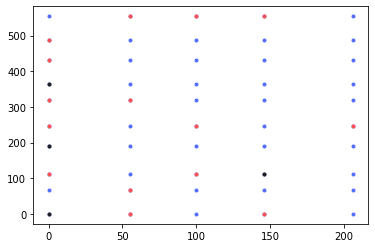

In [17]:
drawTable(table1, '.', 'n')

### Por ultimo, podremos hacer el recorrido bfs
Para este caso debemos hacer que cada punto de distribucion genere un camino a todos los puntos de entrega. Esta funciona debe ser efectuada en todos los puntos existentes de distribucion.

## Description de la data
En primer lugar, podemos observar que tenemos un arreglo doble. Esto se debe a que solo en el ejemplo inicializamos 2 puntos de distribucion y 8 puntos de entrega. Del primer output tenemos, [18, {15: [18,17,16,15]} ...]. Esto significa que el nodo 18 es un punto de distribucion. Dentro del dictionario se encuentra 15 que es un punto de distribucion y dentro de este diccionario hay un arreglo. Esto significa los nodos que recorre para llegar al nodo 15. 

En este caso pasa de 18 distribucion a 17 esquina a 16 esquina y 15 punto de entrega.

In [18]:
recorrido = bfs(matrix1)
print(np.array(recorrido))

[[0
  {10: [0, 10], 2: [0, 1, 2], 11: [0, 1, 11], 30: [0, 10, 20, 30], 4: [0, 1, 2, 3, 4], 22: [0, 1, 2, 12, 22], 5: [0, 1, 2, 3, 4, 5], 15: [0, 1, 2, 3, 4, 5, 15], 24: [0, 1, 2, 3, 4, 14, 24], 7: [0, 1, 2, 3, 4, 5, 6, 7], 8: [0, 1, 2, 3, 4, 5, 6, 7, 8], 44: [0, 1, 2, 3, 4, 14, 24, 34, 44], 19: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 19], 29: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 19, 29], 39: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 19, 29, 39]}]
 [3
  {4: [3, 4], 2: [3, 2], 5: [3, 4, 5], 15: [3, 4, 5, 15], 24: [3, 4, 14, 24], 11: [3, 2, 1, 11], 22: [3, 2, 12, 22], 7: [3, 4, 5, 6, 7], 10: [3, 2, 1, 0, 10], 8: [3, 4, 5, 6, 7, 8], 44: [3, 4, 14, 24, 34, 44], 30: [3, 2, 1, 0, 10, 20, 30], 19: [3, 4, 5, 6, 7, 8, 9, 19], 29: [3, 4, 5, 6, 7, 8, 9, 19, 29], 39: [3, 4, 5, 6, 7, 8, 9, 19, 29, 39]}]
 [6
  {7: [6, 7], 5: [6, 5], 8: [6, 7, 8], 4: [6, 5, 4], 15: [6, 5, 15], 19: [6, 7, 8, 9, 19], 2: [6, 5, 4, 3, 2], 24: [6, 5, 4, 14, 24], 29: [6, 7, 8, 9, 19, 29], 39: [6, 7, 8, 9, 19, 29, 39], 11: [6, 5, 4, 3, 2, 1, 11], 22:

# Ejecucion Hito 3

## Ejecucion con datos de 1 millon

In [19]:
recorrido, edges, ways = hito3(matrix)

### Graficamos los caminos(opcional)

In [21]:
drawRecorrido(table, recorrido, edges, ',','s', '#FFEB3B')

## Ejecucion con datos pequeños

### Utilizamos la funcion hito3
Nos devolvera la lista que recorre apartir de los puntos de distribucion

In [22]:
recorrido1, edges1, ways1 = hito3(matrix1)

### Graficamos los caminos(opcional)

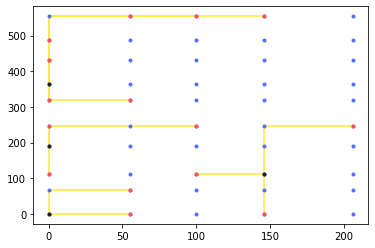

In [23]:
drawRecorrido(table1, recorrido1, edges1, '.', 'n', '#FFEB3B')

# Desarrollo del Algoritmo A*
Este algoritmo es similar al algoritmo del coste minimo. La diferencia entre estos es que dentro de este existe una heuristica la cual utilizade como punto para localizar el mas cercano y existe el valor de tiempo el cual se implementara para la entrega final y creando un grafo.
## Crear nuestros submapas
En primer lugar deberemos crear nuestros submapas
## Generademos un mapa

In [24]:
matrix2, geneDistr2, geneEntre2, table2 = generateMap(10, 10, 5, 18)

## Funcion createSubMap
Esta funcion crea los submapas existente en el mapa original la cual utilizaremos luego para elaborar nuestro algoritmo

In [25]:
def createSubMap(M):
    
    Graph, Edges, distribucion, entrega = graphNoDirec(M)
    
    ways = []
    
    nodes = [i[0] for i in distribucion]
    print(f"Puntos de distribucion: {nodes}")
    pentr = len(entrega)
    dic = {}
    
    mapp = {}
    
    superparent = []
    
    n = len(Edges)
    parent = [[None]]*n
    visited = [False]*n
    
    stack = nodes
    for i in stack:
        visited[i] = True
        parent[i] = [i]

    while stack:
        pos = stack[0]

        for i in range(len(Graph[pos])):
            node, x, y, t = Graph[pos][i]
            
            if visited[node] == False:
                lp = parent[pos][:]
                lp.append(node)
                parent[node] = lp
                dic[node] = parent[node]
                visited[node] = True
                                
                if lp[0] not in mapp.keys():
                    mapp[lp[0]] = [lp[0]]
                else:
                    aux = mapp[lp[0]]
                    aux.append(node)
                    mapp[lp[0]] = aux
                
                stack.append(node)

        stack.pop(0)
    return dic, Edges, mapp

# Ejecutamos nuestro subMapa

## SubMapa de 1 millon

In [26]:
recorridoM, edgesM, submapM = createSubMap(matrix)

Puntos de distribucion: [4256, 7282, 14991, 16364, 37996, 40029, 127205, 128839, 129495, 132059, 136786, 141612, 146104, 152320, 164187, 181880, 185113, 192806, 210195, 211607, 220463, 222059, 234415, 260285, 264196, 271274, 286194, 296282, 296787, 302404, 303146, 336644, 352442, 357503, 364425, 373322, 376372, 389849, 392785, 394230, 402067, 410544, 412877, 423295, 425491, 447332, 461691, 469744, 476239, 494101, 518953, 524019, 535801, 538196, 543812, 559293, 566683, 584998, 599189, 609326, 634286, 650958, 662385, 702044, 708522, 713561, 735827, 737959, 741442, 742133, 754693, 759487, 771317, 786053, 786484, 788019, 804289, 817765, 828542, 832334, 843379, 845397, 845749, 848075, 853332, 860368, 863016, 865918, 867467, 868004, 907090, 913774, 935577, 944154, 947680, 967072, 983461, 984195, 986816, 999901]


## SubMapa pequeño

In [27]:
recorrido2, edges2, submap2 = createSubMap(matrix2)
print(submap2)

Puntos de distribucion: [14, 58, 74, 84, 95]
{14: [14, 13, 24, 4, 16, 25, 5, 12, 23, 3, 34, 17, 26, 6, 35, 11, 22, 2, 33, 44, 18, 27, 7, 36, 45, 10, 21, 1, 32, 43, 19, 8, 20, 0, 31, 42, 9, 30, 41, 40], 58: [58, 57, 68, 48, 69, 49, 56, 67, 47, 78, 38, 79, 39, 55, 66, 46, 77, 37, 88, 28, 89, 29], 74: [74, 73, 64, 76, 65, 72, 63, 54, 71, 62, 53, 70, 61, 52, 60, 51, 50], 84: [84, 83, 94, 86, 82, 93, 87, 81, 92, 80, 91, 90], 95: [95, 97, 98, 99]}


# Grafica del subMap(Optional)

## Grafo con 1 millon (falta mejorar rendimiento)

In [28]:
#drawRecorrido(table, recorridoM, edgesM, ',', 's', '#FFEB3B')

## Grafo con un ejemplo pequeño

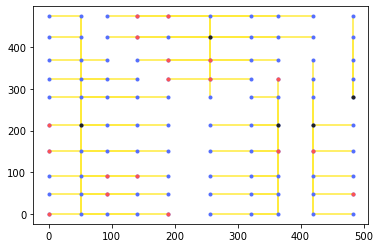

In [29]:
drawRecorrido(table2, recorrido2, edges2, '.', 'n', '#FFEB3B')

# Funcion HeuristicByOrder
Esta funcion se encargara de encontrar del punto en el que se encuentra un camino mas corto y el cual no genere muchos recursos al computador, ya que a menor heuristica mayor es la cercania de un punto a otro

In [30]:
def heuristicByOrder(x,y,submatrix,edge):
    
    mini = float('inf')
    
    for i in submatrix:
        node, xx, yy, t = edge[i]
        v = heuristic(x-xx,y-yy)
        if v < mini:
            mini = v
    return mini

# Funcion OrderByPos
Esta funcion cumple la finalidad que cuando finalice el proceso de un nodo pueda ordenar el listado que hay en el stack para que pueda volver a ejecutar pero apartir de una heuristica menor y mas favorable a la busqueda del camino

In [31]:
def orderByPos(stack, pos):
    
    def take(elem):
        return elem[pos]
    
    stack.sort(key=take)

# Funcion algoritmA
## Hito 3
Esta funcion es la que se ejecutara para poder encontrar el camino mas corto y beneficioso para la empresa de transporte. Para esta entrega se esta evitando realizar las operacion con el tiempo, ya que se tiene planeado para la entrega final tener el codigo terminado en un 100%.
Por el momento el codigo va en un 75%, ya que falta el grafico que aporta 5%, 5% para el coste del tiempo, 5% para el costo total por recorridos y **10% para implementar el codigo en los nodos de 1 millon**
## Hito 4
Se estubo realizando mejoras y se mejoro la parte de la implementacion del algoritmo ya tenemos la parte grafica que era el 5%, se implemento el 10% de los nodos de 1 millon, pero falta aumenta el costo por recorrido y tiempo. Asi que falta un **10% del codigo**.

In [39]:
def algoritmA(M, init, exc):
    
    Graph, Edges, distribucion, entrega = graphNoDirec(M)
    
    n = len(Graph)
    visited = [False]*n
    parent = [[None]]*n
    parent[init] = [init]
    visited[init] = True
    
    dic = {}
    
    stack = []
    stack.append([init, 0])
    
    entregaA = []
    
    for i in exc:
        if Edges[i][3] == 2:
            entregaA.append(i)    
    
    print(f"Puntos de entrega {entregaA}")
    fin = len(entregaA)
    
    while stack and fin != 0:
        
        pos, cost = stack[0]
        if fin == 0:
            print(True)
            return
        
        for edge in Graph[pos]:
            node, x, y, t = edge
            
            h = heuristicByOrder(x, y, entregaA, Edges)
            
            if visited[node] == False and node in exc:
                
                lp = parent[pos][:]
                lp.append(node)
                parent[node] = lp
                
                if t == 2:
                    dic[node] = parent[node]
                
                visited[node] = True
                stack.append([node, h])
                
                if node in entregaA:
                    fin -= 1
        stack.pop(0)
        orderByPos(stack,1)
        
        #print(f"Order: {stack}")
    return dic, Edges
    

# Initializacion del Algoritmo A*
Para initializar debemos recoletar los datos anteriores. De esta manera, inicializaremos el codigo. En este caso, estoy utilizando el primer elemento del dictionario donde se encuentra la **key** el cual es el nodo de distribucion y los **values** que son los nodos donde solo podra recorrer el algoritmo.

## Ejemplo en un grafo 1 millon

In [45]:
keys = list((submapM.keys()))
firstElement = keys[0]
recorridoMA, edgesMA = algoritmA(matrix, firstElement, submapM[firstElement])

Puntos de entrega [14250, 18260, 19267, 13229, 41254, 32238, 40237, 12190, 36210, 76249, 79261, 45217, 46217, 25175, 8157, 10153, 5130]


### Diferencia entre recorrido BFS

In [47]:
drawRecorrido(table, recorrido, edges, ',','s', '#FFEB3B')

### Diferencia entre recorrido A*

In [46]:
drawRecorridoWithWay(table, recorridoMA, edgesMA, ',', 's', '#0CFA9B')

## Ejemplo en un grafo pequeño

In [40]:
keys = list((submap2.keys()))
firstElement = keys[0]
recorridoA, edgesA = algoritmA(matrix2, firstElement, submap2[firstElement])

Puntos de entrega [4, 3, 22, 21, 32, 0, 40]


In [41]:
recorridoBFS, edgesBFS, waysBFS = hito3(matrix2)

### Difererencia entre recorrido BFS

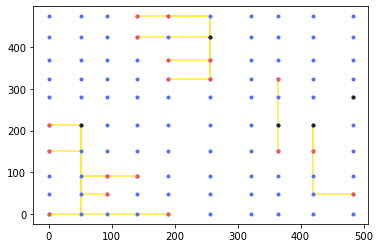

In [42]:
drawRecorrido(table2, recorridoBFS, edgesBFS, '.', 'n', '#FFEB3B')

### Difererencia entre recorrido A*

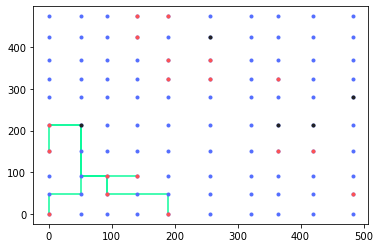

In [43]:
drawRecorridoWithWay(table2, recorridoA, edgesA, '.', 'n', '#0CFA9B')

5